In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor 

cleaned_pd = pd.read_csv("data_cleaned_raw.csv")

In [2]:
subject_ids = cleaned_pd['subject_id'].unique()
labels = cleaned_pd['label'].unique()
sensor_cols = ['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','mag_x','mag_y','mag_z']

In [3]:
pd_list = []
for id in subject_ids:
    for label in labels:
        filtered_pd = cleaned_pd[(cleaned_pd['subject_id']==id)&(cleaned_pd['label']==label)].copy()
        for col in sensor_cols:
            clf = LocalOutlierFactor()
            X = filtered_pd.loc[:,col].values.reshape(-1,1)
            outliers = clf.fit_predict(X)
            filtered_pd[col+'_outlier'] = outliers
            pd_list.append(filtered_pd)

outlier_pd = pd.concat(pd_list)

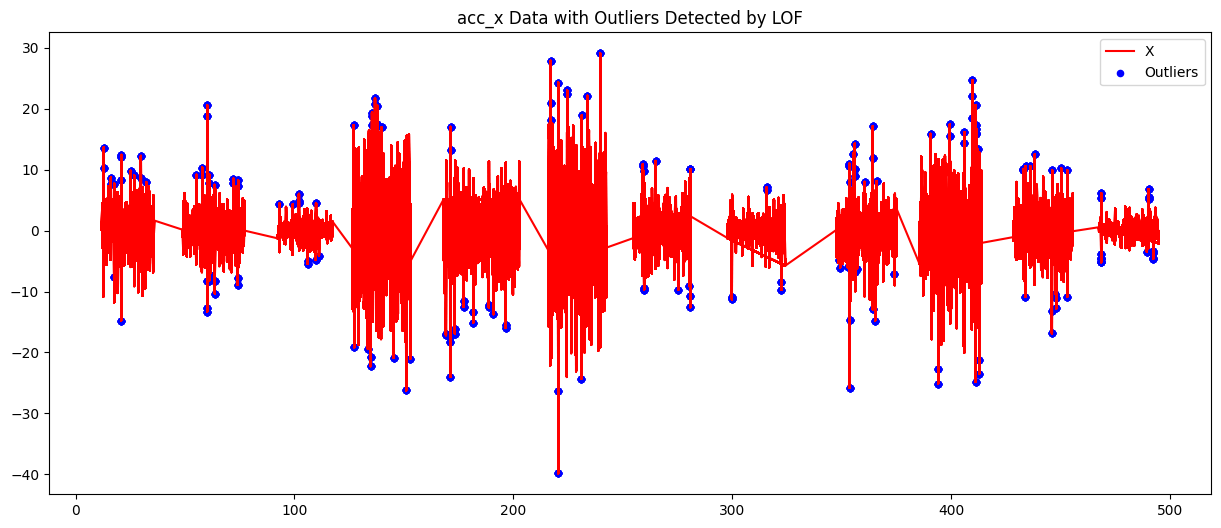

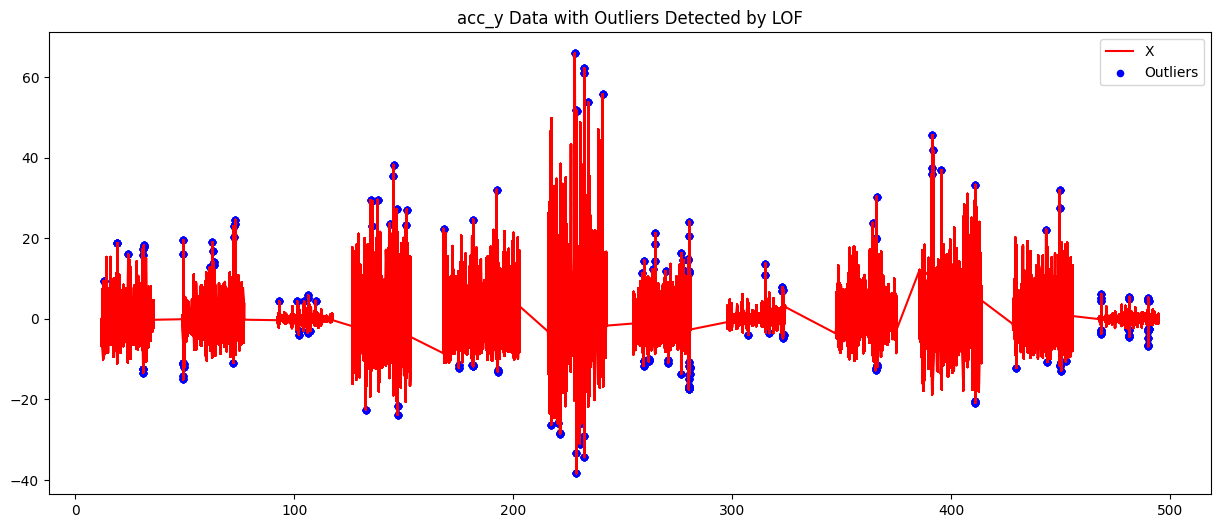

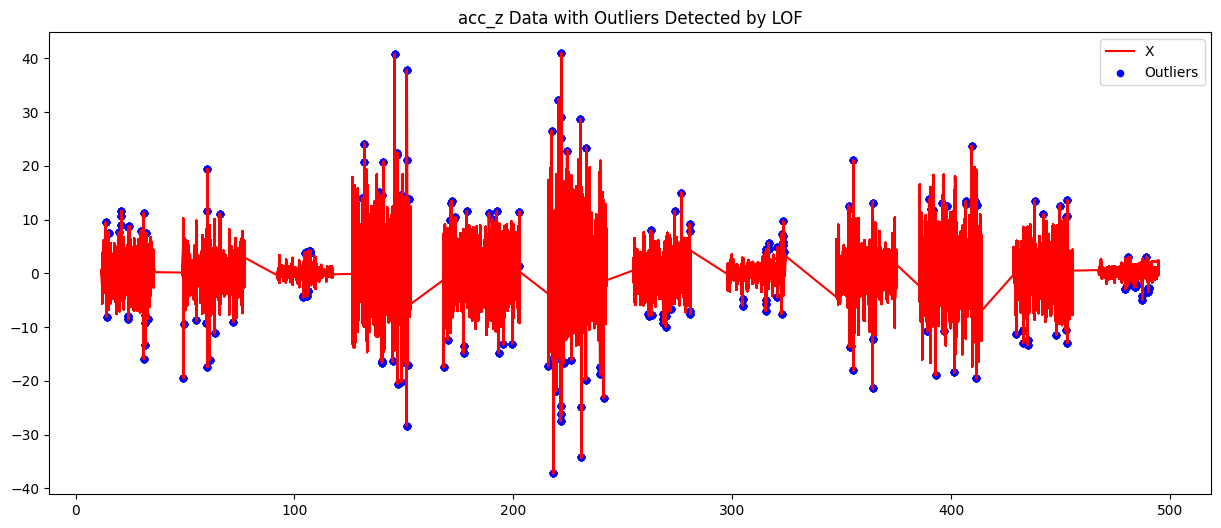

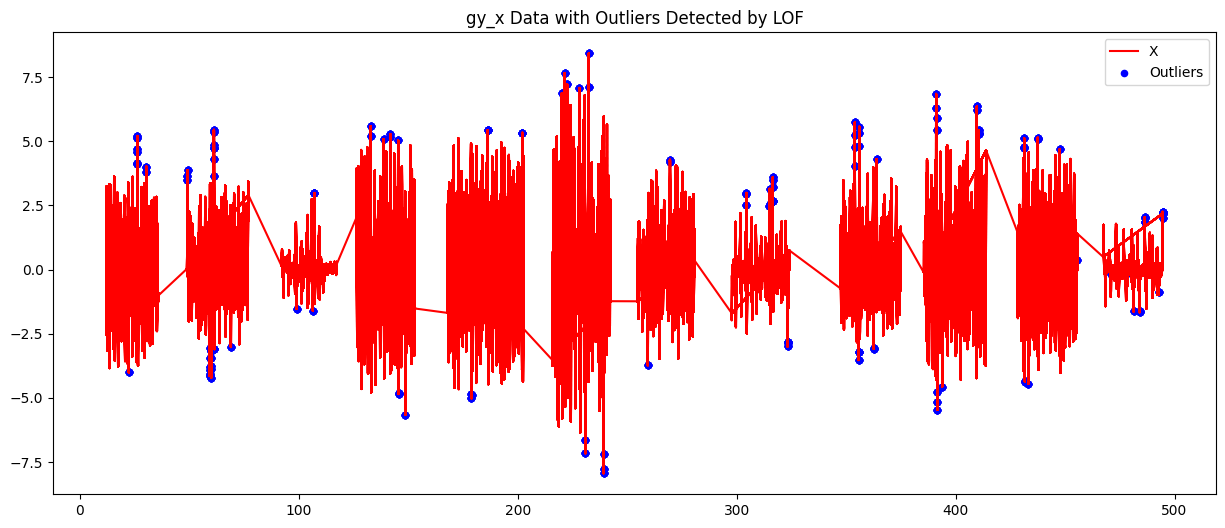

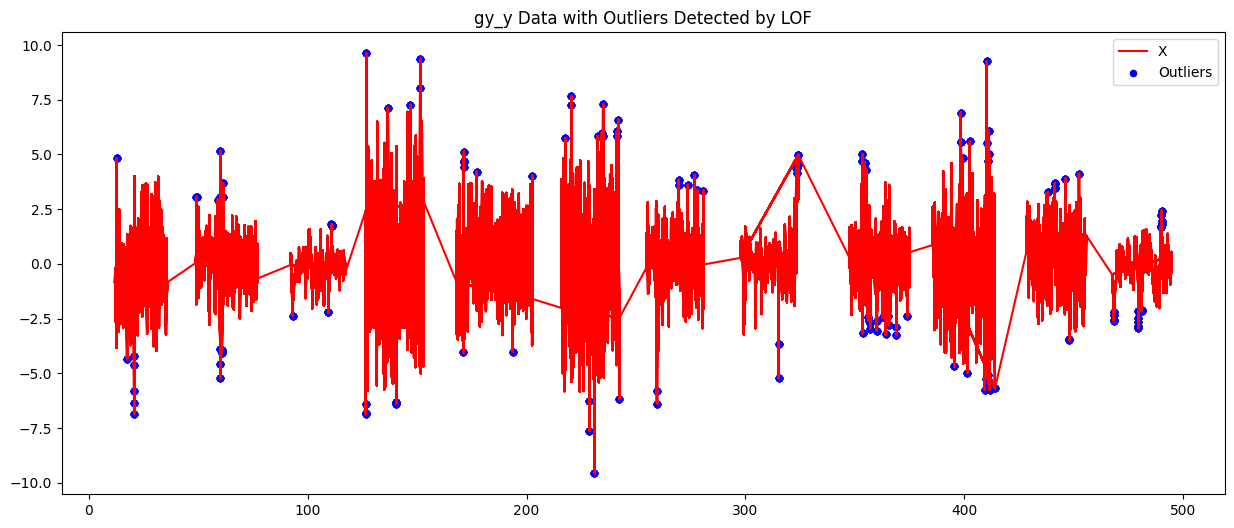

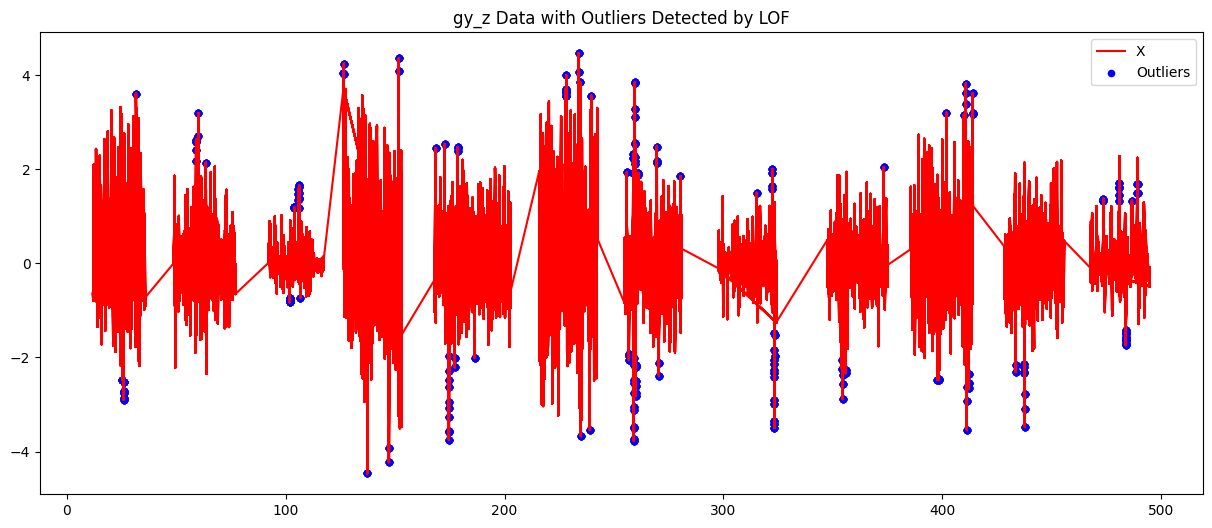

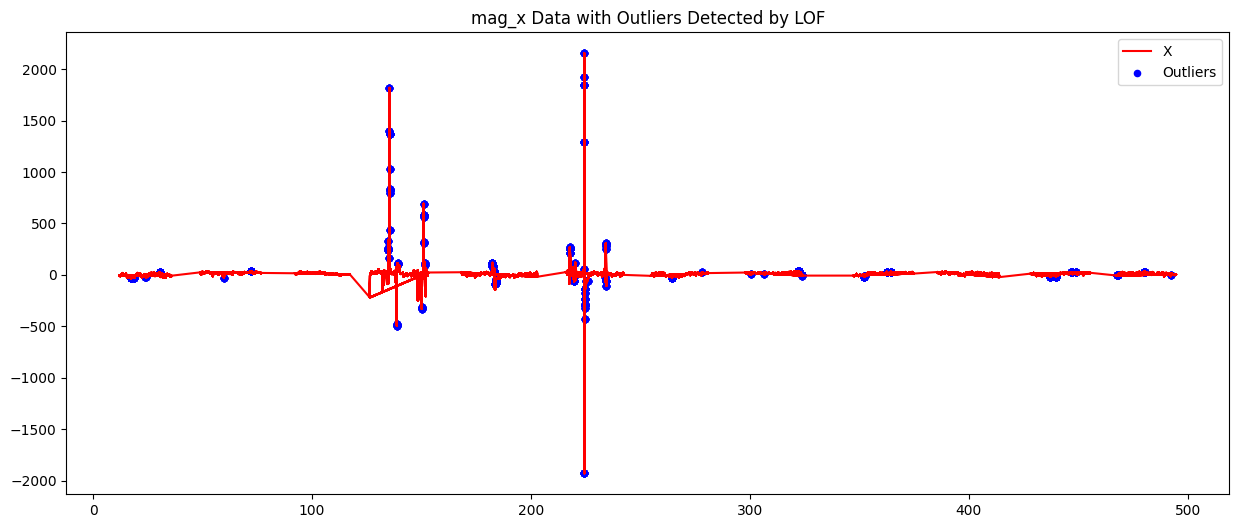

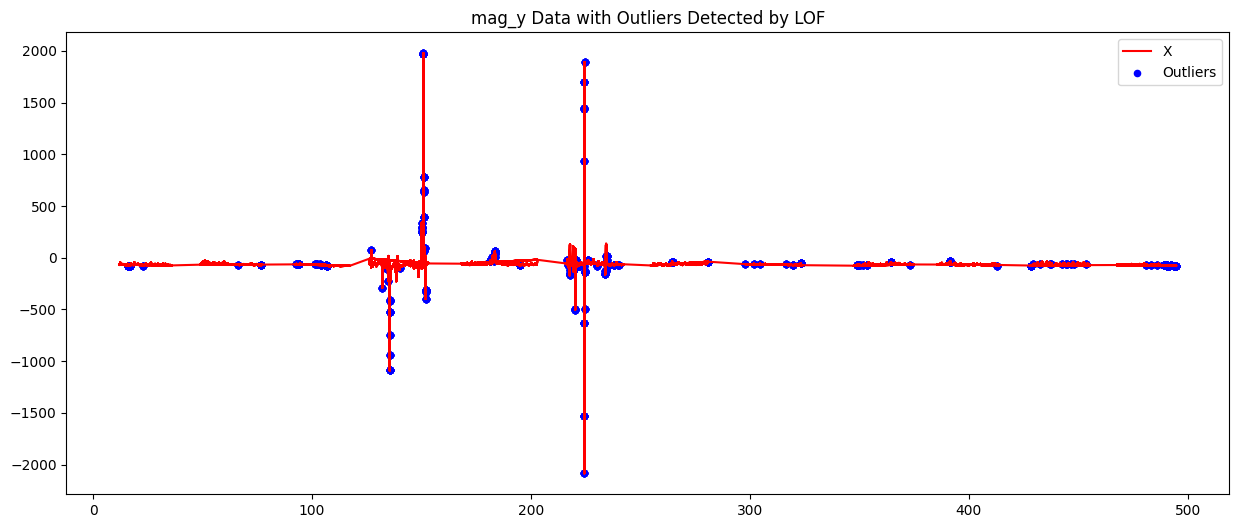

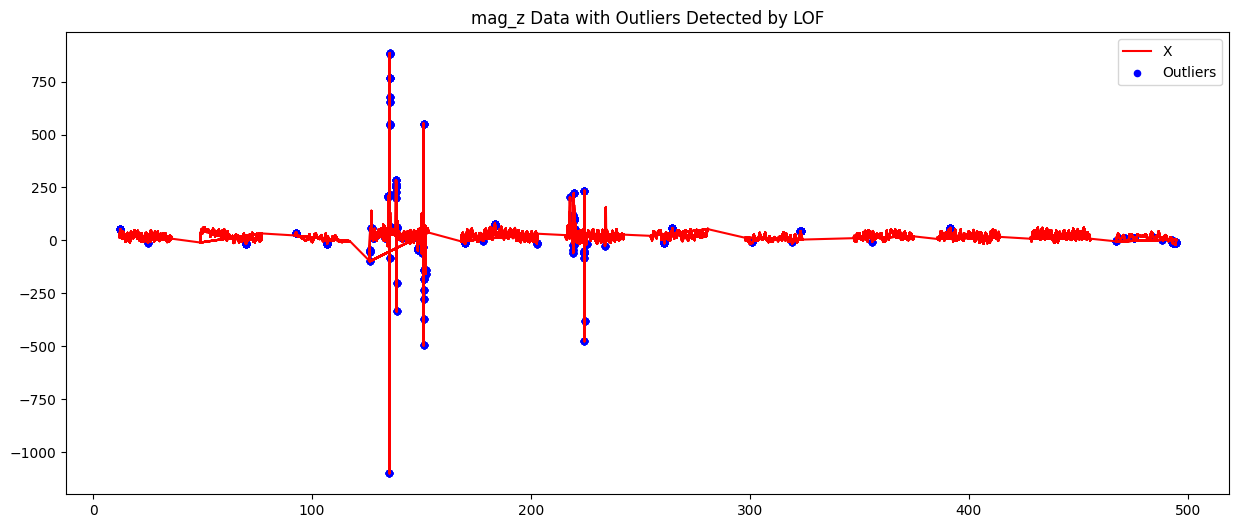

In [4]:
plot_pd = outlier_pd[outlier_pd['subject_id']==0].copy()

for col in sensor_cols:

    plt.figure(figsize=(15, 6))
    plt.plot(plot_pd['time'], plot_pd[col], color='r', label='X')

    outlier_mask = plot_pd[col + '_outlier'] == -1
    plt.scatter(plot_pd['time'][outlier_mask], plot_pd[col][outlier_mask], color='blue', label='Outliers', s=20)

    plt.title(col + ' Data with Outliers Detected by LOF')
    plt.legend()
    plt.show()

In [6]:
pd_list = []
for id in subject_ids:
    for label in labels:
        filtered_pd = outlier_pd[(outlier_pd['subject_id']==id)&(outlier_pd['label']==label)].copy()
        for col in sensor_cols:
            
            min_value = min(filtered_pd.loc[filtered_pd[col+'_outlier']==1,col])
            max_value = max(filtered_pd.loc[filtered_pd[col+'_outlier']==1,col])


            filtered_pd.loc[(filtered_pd[col+'_outlier']==-1)&(filtered_pd[col]<0),col] = min_value
            filtered_pd.loc[(filtered_pd[col+'_outlier']==-1)&(filtered_pd[col]>0),col] = max_value

            pd_list.append(filtered_pd)

trimmed_pd = pd.concat(pd_list)

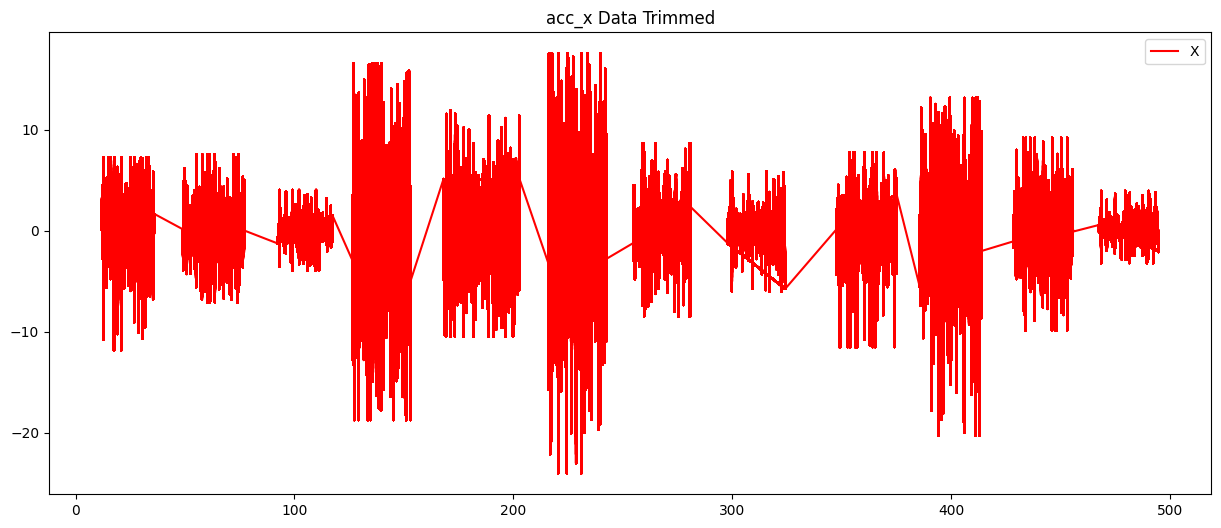

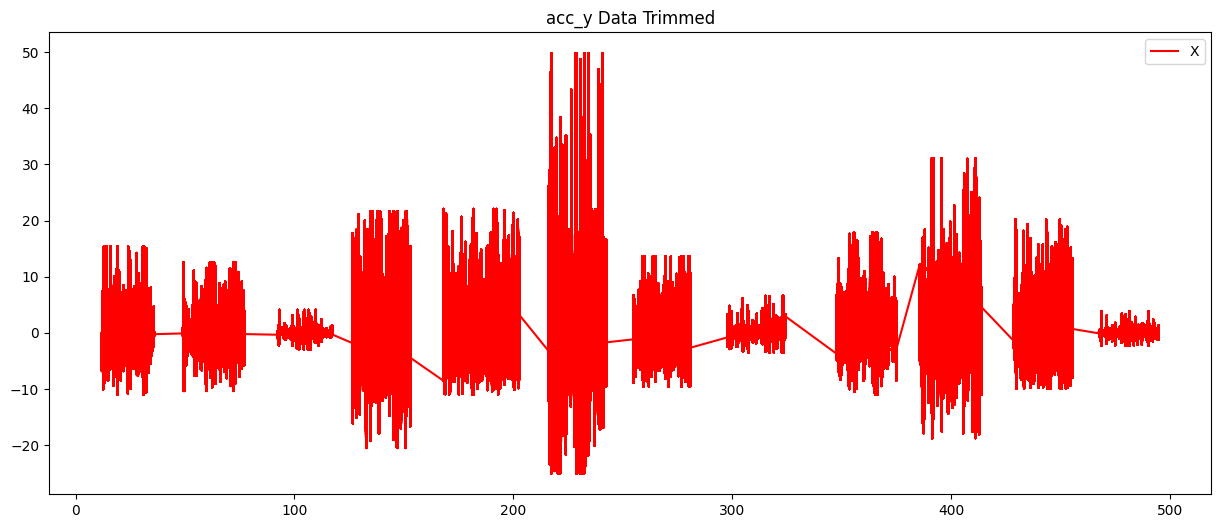

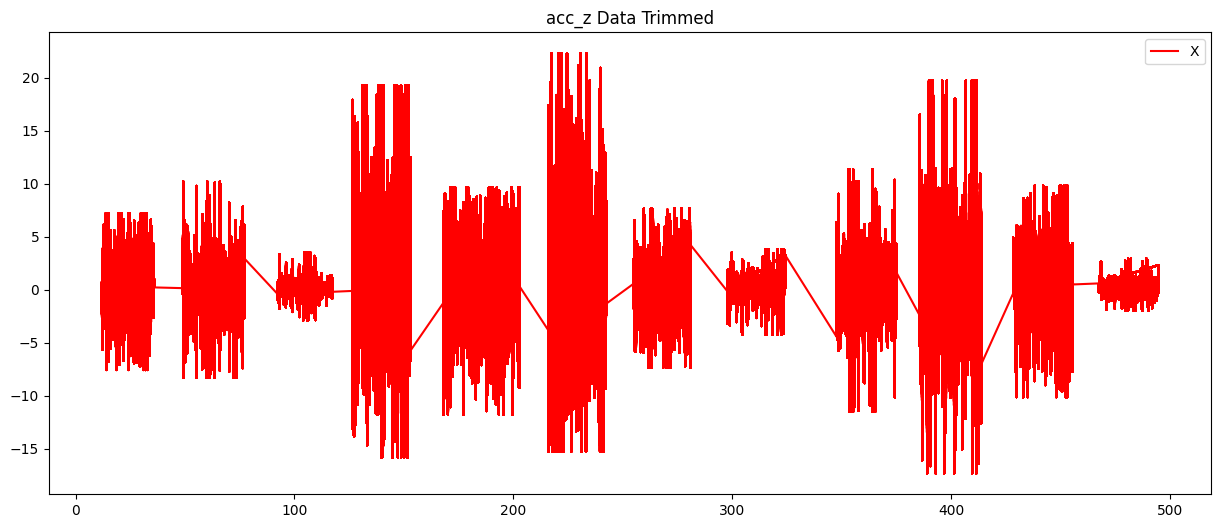

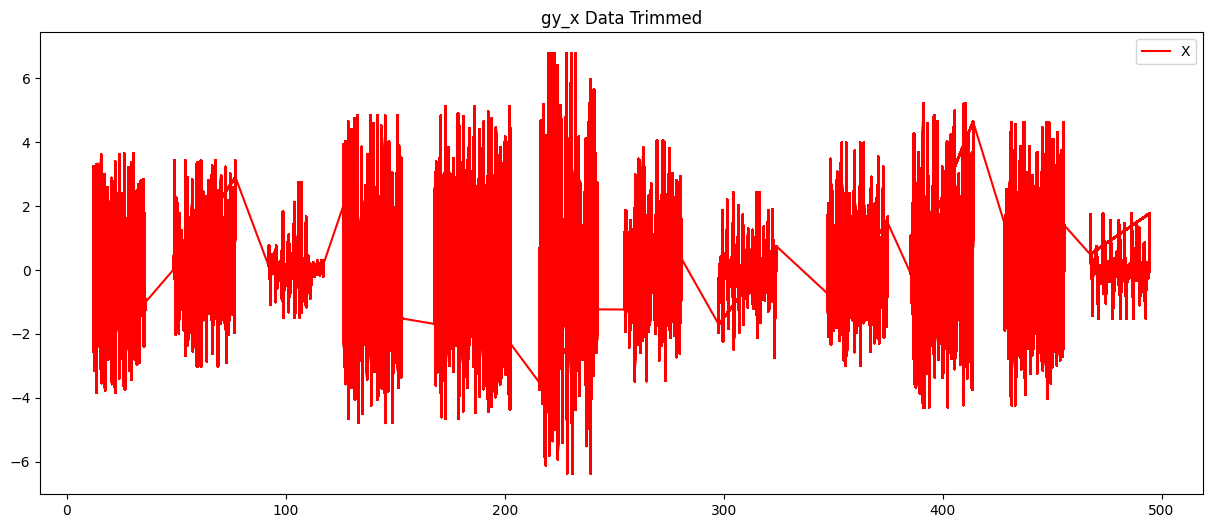

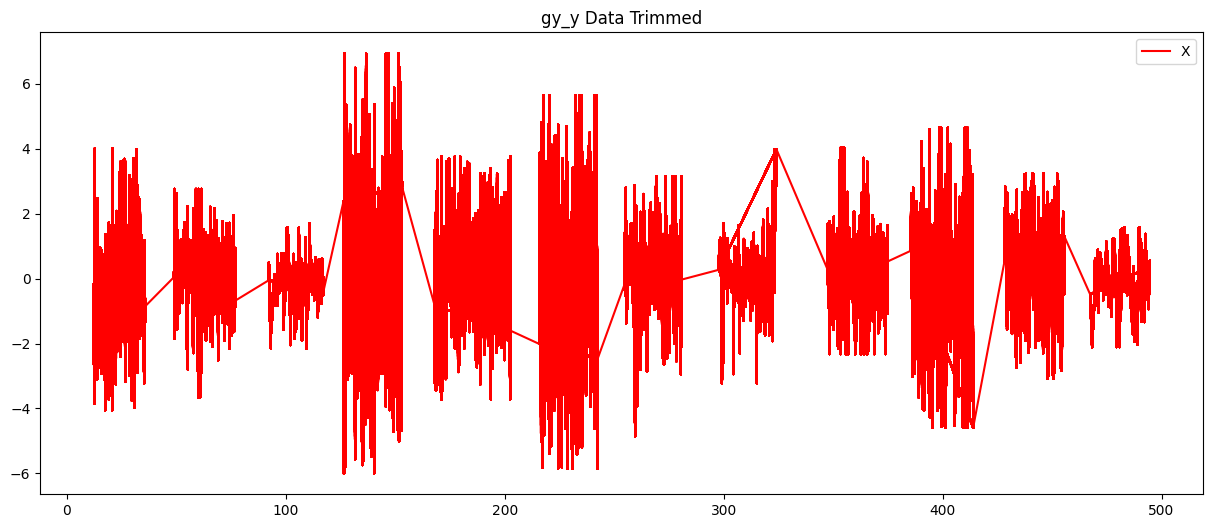

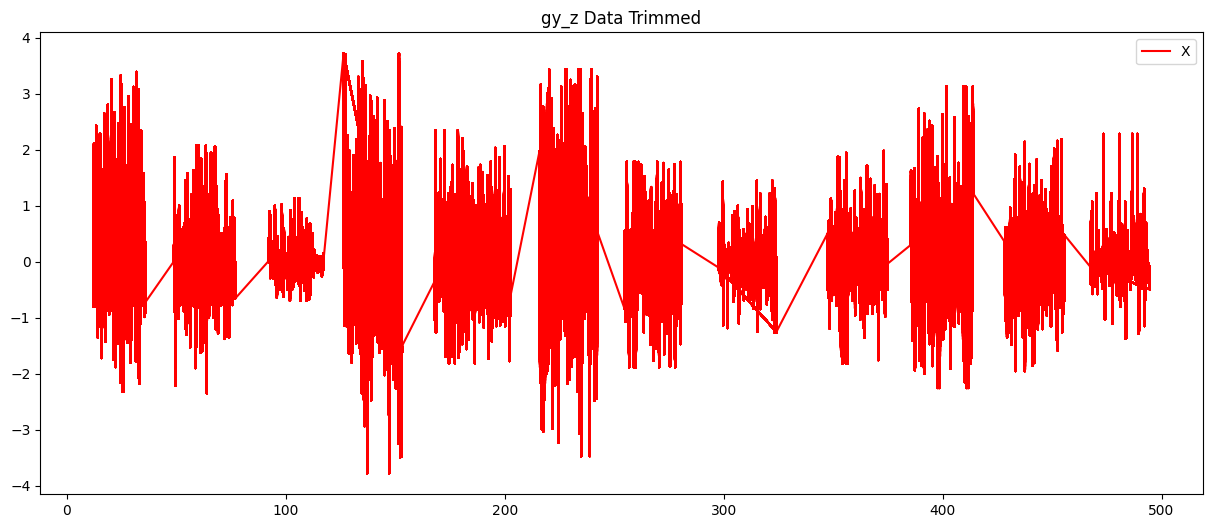

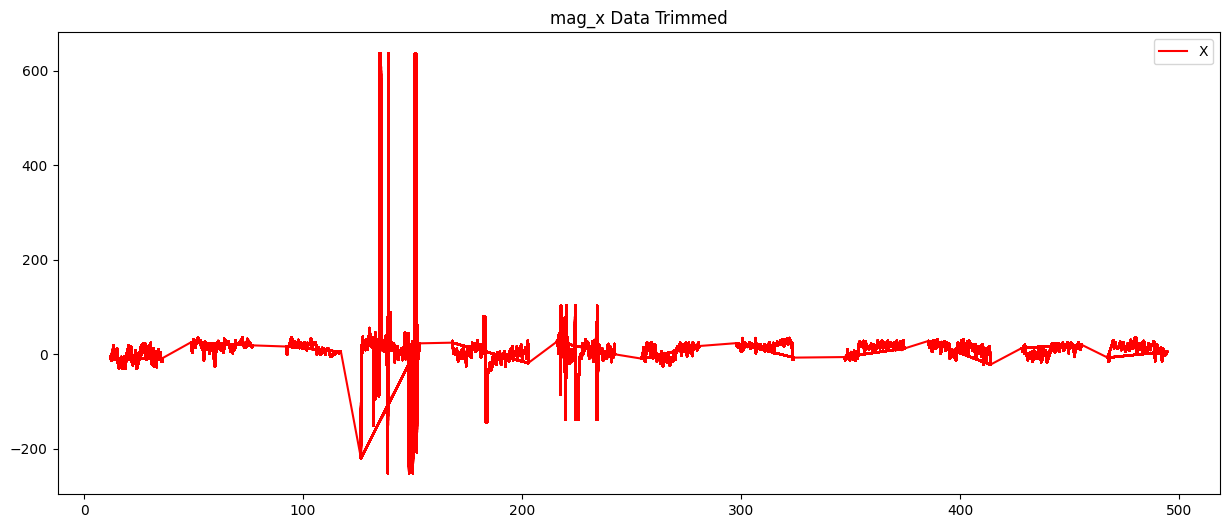

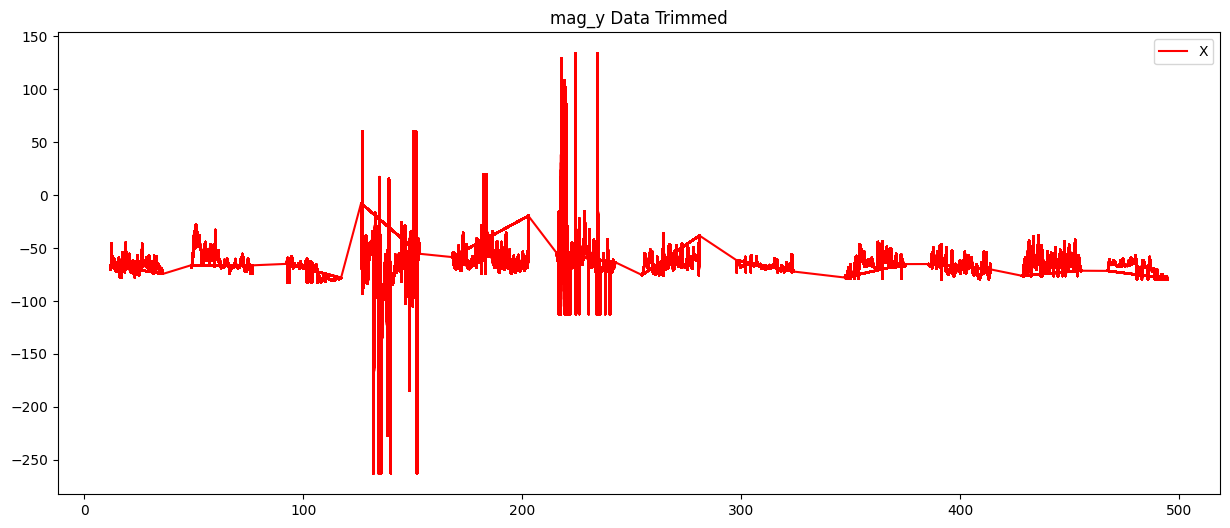

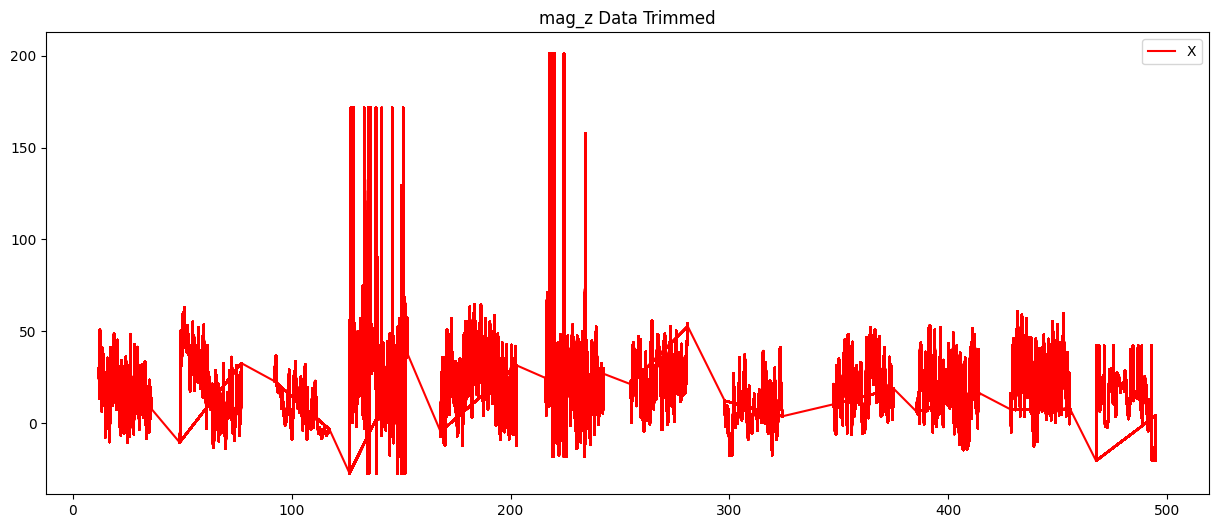

In [7]:
plot_pd = trimmed_pd[trimmed_pd['subject_id']==0].copy()

for col in sensor_cols:

    plt.figure(figsize=(15, 6))
    plt.plot(plot_pd['time'], plot_pd[col], color='r', label='X')

    plt.title(col + ' Data Trimmed')
    plt.legend()
    plt.show()